# Real Estate Clean up

This is a real dataset, and it was downloaded using web scraping techniques. The data contains registers from **Fotocasa** which is one of the most popular real estate websites in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro, and in no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [6]:
import pandas as pd

# This CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [7]:
# TODO
from geopy.geocoders import Nominatim
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
housingData = pd.DataFrame(ds)

housingData['latitude'] = housingData['latitude'].str.replace(',', '.').astype(float) 
housingData['longitude'] = housingData['longitude'].str.replace(',', '.').astype(float)

def get_address(latitude, longitude):
    geolocator = Nominatim(user_agent="address_from")
    coordinates = f"{latitude:.6f}, {longitude:.6f}" 
    location = geolocator.geocode(coordinates) 
    return location.address if location else None

maxPrice = housingData['price'].max()
expensiveHouse = housingData[housingData['price'] == maxPrice]

# latitude = expensiveHouse[['latitude']]
# longitude = expensiveHouse[['longitude']]
# print(expensiveHouse)
# print(latitude)
# print(longitude)
# print(get_address(latitude, longitude))

for index, row in expensiveHouse.iterrows():
    address = get_address(row['latitude'], row['longitude'])
    price = row['price']

    print(f"The house with address {address} is the most expensive and its price is {price} USD")


The house with address 12, Calle Independencia, Urbanización Parque Real, El Escorial, Comunidad de Madrid, 28280, España is the most expensive and its price is 8500000 USD


#### Exercise 02. Which is the cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [8]:
# TODO
from geopy.geocoders import Nominatim
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
housingData = pd.DataFrame(ds)

housingData['latitude'] = housingData['latitude'].str.replace(',', '.').astype(float) 
housingData['longitude'] = housingData['longitude'].str.replace(',', '.').astype(float)

def get_address(latitude, longitude):
    geolocator = Nominatim(user_agent="address_from")
    coordinates = f"{latitude:.6f}, {longitude:.6f}" 
    location = geolocator.geocode(coordinates) 
    return location.address if location else None

realPrice = housingData[housingData['price'] > 0]
minPrice = realPrice['price'].min()
cheapestHouse = realPrice[realPrice['price'] == minPrice]

for index, row in cheapestHouse.iterrows():
    address = get_address(row['latitude'], row['longitude'])
    price = row['price']

    print(f"The house with address {address} is the cheapest and its price is {price} USD")


The house with address 2, Avenida de Lisboa, Coslada, Comunidad de Madrid, 28822, España is the cheapest and its price is 600 USD


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The biggest house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smallest house is located on County Road 1 N and its surface is 200 meters`

In [9]:
# TODO
from geopy.geocoders import Nominatim
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
housingData = pd.DataFrame(ds)

housingData['latitude'] = housingData['latitude'].str.replace(',', '.').astype(float) 
housingData['longitude'] = housingData['longitude'].str.replace(',', '.').astype(float)

def get_address(latitude, longitude):
    geolocator = Nominatim(user_agent="address_from")
    coordinates = f"{latitude:.6f}, {longitude:.6f}" 
    location = geolocator.geocode(coordinates) 
    return location.address if location else None

maxSize = housingData['surface'].max()
biggestHouse = housingData[housingData['surface'] == maxSize]

minSize = housingData['surface'].min()
smallestHouse = housingData[housingData['surface'] == minSize]

combinedHouses = pd.concat ([biggestHouse, smallestHouse])

for index, row in combinedHouses.iterrows():
    address = get_address(row['latitude'], row['longitude'])
    surface = row['surface']
    if surface == maxSize:
        print(f"The biggest house is located on {address} and its surface is {surface} meters")
    elif surface == minSize:
        print(f"The smallest house is located on {address} and its surface is {surface} meters")

The biggest house is located on Calle Juan Carlos I, Las Brisas, Los Manantiales, Sevilla la Nueva, Comunidad de Madrid, 28609, España and its surface is 249000.0 meters
The smallest house is located on Pum Pum Café, 6, Calle de Tribulete, Lavapiés, Embajadores, Centro, Madrid, Comunidad de Madrid, 28012, España and its surface is 15.0 meters


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the names of the populations with a comma as a separator. For example:

`> print(populations)`

`population1, population2, population3, ...`

In [10]:
# TODO
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
housingData = pd.DataFrame(ds)

populations = housingData['level5'].unique()
populationList = [str(population) for population in populations]
populationData = ', '.join(populationList)

print(populationData)

Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Escorial, Loeches, San Martín de Valdeiglesias, Navas del Rey, Busta

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`True` or `False`) followed by the rows/cols that contains NAs.

In [11]:
# TODO
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
housingData = pd.DataFrame(ds)

naValues = housingData.isnull().values.any()

print(f"Contains NAs: {naValues}")

if naValues:
    naRows = housingData[housingData.isnull().any(axis=1)]
    print("Rows with NAs:")
    print(naRows)

    naCols = housingData.columns[housingData.isnull().any()].tolist()
    print("Columns with NAs:")
    print(naCols)


Contains NAs: True
Rows with NAs:
       Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
0               1       153771986  False            ferrari 57 inmobiliaria   
1               2       153867863  False  tecnocasa fuenlabrada ferrocarril   
2               3       153430440  False                 look find boadilla   
3               4       152776331  False  tecnocasa fuenlabrada ferrocarril   
4               5       153180188  False            ferrari 57 inmobiliaria   
...           ...             ...    ...                                ...   
15330       15331       153901377  False                infocasa consulting   
15331       15332       150394373  False                inmobiliaria pulpon   
15332       15333       153901397  False             tecnocasa torrelodones   
15333       15334       152607440  False                inmobiliaria pulpon   
15334       15335       153901356  False                infocasa consulting   

       phone_real

#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions.

In [12]:
# TODO
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
housingData = pd.DataFrame(ds)

originalData = housingData.shape
print(f"Original dimensions: {originalData}")

cleanedHousingData = housingData.dropna(axis=1)

newData = cleanedHousingData.shape
print(f"New dimensions after removing NAs: {newData}")



Original dimensions: (15335, 37)
New dimensions after removing NAs: (15335, 25)


#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value.

In [13]:
# TODO
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
housingData = pd.DataFrame(ds)

arroyomolinosData = housingData[housingData['level5'] == 'Arroyomolinos (Madrid)']

# print(arroyomolinosData)

meanPrice = arroyomolinosData['price'].mean()

print(f"The mean price of properties in 'Arroyomolinos (Madrid)' is {meanPrice:.2f} USD")

The mean price of properties in 'Arroyomolinos (Madrid)' is 294541.60 USD


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

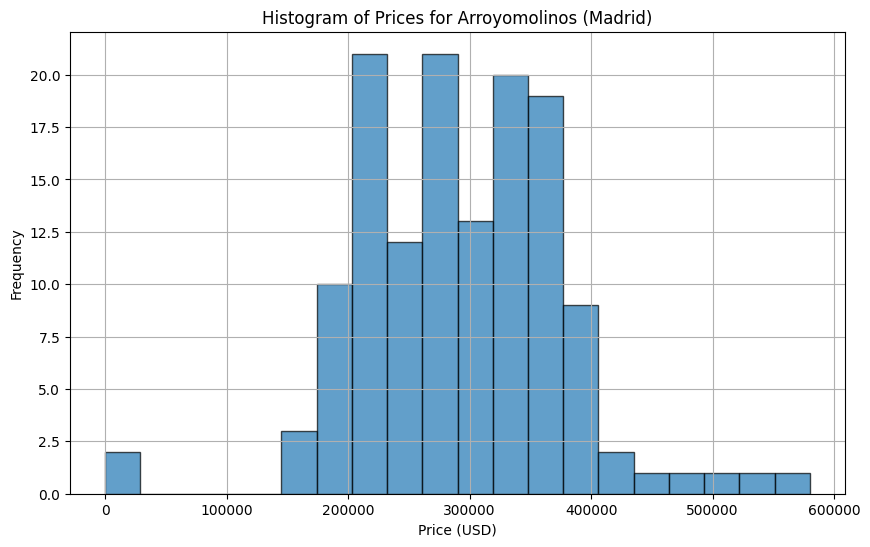

In [14]:
# TODO: Code
import pandas as pd
import matplotlib.pyplot as plt

ds = pd.read_csv('assets/real_estate.csv', sep=';')
housingData = pd.DataFrame(ds)

arroyomolinosData = housingData[housingData['level5'] == 'Arroyomolinos (Madrid)']

# Plot the histogram of prices
plt.figure(figsize=(10, 6))
plt.hist(arroyomolinosData['price'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Prices for Arroyomolinos (Madrid)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Most of the property prices are between 200000 and 400000, teh highest frequency is around the 250000 to 300000 which means that this is the most common price range,there are also a few higher prices extending to the right

#### Exercise 09. Are the average prices of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about them.

In [15]:
# TODO
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
housingData = pd.DataFrame(ds)

valdemorilloData = housingData[housingData['level5'] == 'Valdemorillo']

galapagarData = housingData[housingData['level5'] == 'Galapagar']

valdemorilloPrices = valdemorilloData['price'].mean()
galapagarPrices = galapagarData['price'].mean()

# Print the results
print(f"The average price of properties in Valdemorillo is {valdemorilloPrices:.2f} USD")
print(f"The average price of properties in Galapagar is {galapagarPrices:.2f} USD")
print('based on this prices, we can conclude that the prices are pretty much the same, with just 3,797.09 USD of difference which is not too different')


The average price of properties in Valdemorillo is 363860.29 USD
The average price of properties in Galapagar is 360063.20 USD
based on this prices, we can conclude that the prices are pretty much the same, with just 3,797.09 USD of difference which is not too different


#### Exercise 10. Are the average prices per square meter (price/m2) of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about it.

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [16]:
# TODO
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
housingData = pd.DataFrame(ds)

housingData['pps'] = housingData['price'] / housingData['surface']

# Filter the DataFrame for "Valdemorillo" population
valdemorilloData = housingData[housingData['level5'] == 'Valdemorillo']

# Filter the DataFrame for "Galapagar" population
galapagarData = housingData[housingData['level5'] == 'Galapagar']

# Calculate the mean price per square meter for both populations
valdemorillopps = valdemorilloData['pps'].mean()
galapagarpps = galapagarData['pps'].mean()

# Print the results
print(f"The mean price per square meter in Valdemorillo is {valdemorillopps:.2f} USD/sqm")
print(f"The mean price per square meter in Galapagar is {galapagarpps:.2f} USD/sqm")

# Conclusion
if valdemorillopps == galapagarpps:
    conclusion = "The average prices per square meter of properties in Valdemorillo and Galapagar are the same."
else:
    conclusion = f"The average prices per square meter of properties in Valdemorillo and Galapagar are different. The mean price per square meter in Valdemorillo is {valdemorillopps:.2f} USD/sqm, while in Galapagar it is {galapagarpps:.2f} USD/sqm."

print(conclusion)


The mean price per square meter in Valdemorillo is 1317.95 USD/sqm
The mean price per square meter in Galapagar is 1606.32 USD/sqm
The average prices per square meter of properties in Valdemorillo and Galapagar are different. The mean price per square meter in Valdemorillo is 1317.95 USD/sqm, while in Galapagar it is 1606.32 USD/sqm.


#### Exercise 11. Analyze the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot`, then write a conclusion about it.

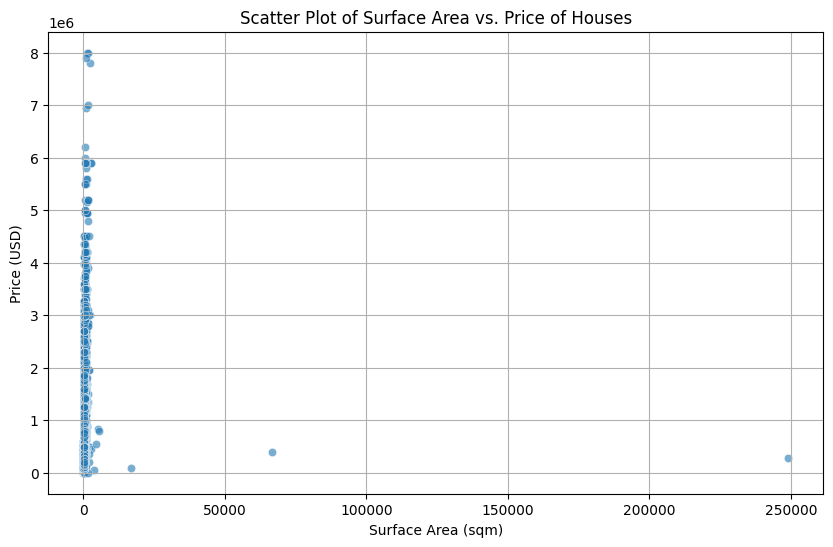

In [17]:
# TODO: Code
import pandas as pd
import matplotlib.pyplot as plt

ds = pd.read_csv('assets/real_estate.csv', sep=';')
housingData = pd.DataFrame(ds)

plt.figure(figsize=(10, 6))
plt.scatter(housingData['surface'], housingData['price'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Scatter Plot of Surface Area vs. Price of Houses')
plt.xlabel('Surface Area (sqm)')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


The majority of the data points are clustered in the lower surface area range, specifically below 50,000 square meters, also the prices varies a lot indicating that other factors beyond surface might influence the price

#### Exercise 12. How many real estate agencies does the dataset contain? (★★☆)

Print the obtained value.

In [18]:
# TODO
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
housingData = pd.DataFrame(ds)

realStateCount = housingData['realEstate_name'].nunique()

print(f"Number of real estate agencies: {realStateCount}")


Number of real estate agencies: 1821


#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses.

In [19]:
# TODO
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
housingData = pd.DataFrame(ds)

populationData = housingData['level5'].value_counts()

mostHouses = populationData.idxmax()
housesCount = populationData.max()

print(f"The population with the most houses is '{mostHouses}' with {housesCount} houses.")


The population with the most houses is ' Madrid Capital' with 6643 houses.


#### Exercise 14. Now let's work with the "south belt" of Madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`.

In [20]:
# TODO
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
housingData = pd.DataFrame(ds)

subsetData = housingData[housingData['level5'].isin(["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"])]

print(subsetData)


       Unnamed: 0  id_realEstates  isNew  \
1               2       153867863  False   
3               4       152776331  False   
85             86       153152077  False   
94             95       153995577  False   
109           110       153586414  False   
...           ...             ...    ...   
15275       15276       153903887  False   
15291       15292       151697757  False   
15305       15306       153902389  False   
15322       15323       153871864  False   
15325       15326       153901467  False   

                                 realEstate_name  phone_realEstate  \
1              tecnocasa fuenlabrada ferrocarril       916358736.0   
3              tecnocasa fuenlabrada ferrocarril       916358736.0   
85                       sinergical inmobiliaria               NaN   
94                               viviendas365com       911226014.0   
109              area uno asesores inmobiliarios       912664081.0   
...                                          ...   

#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in Exercise 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot.

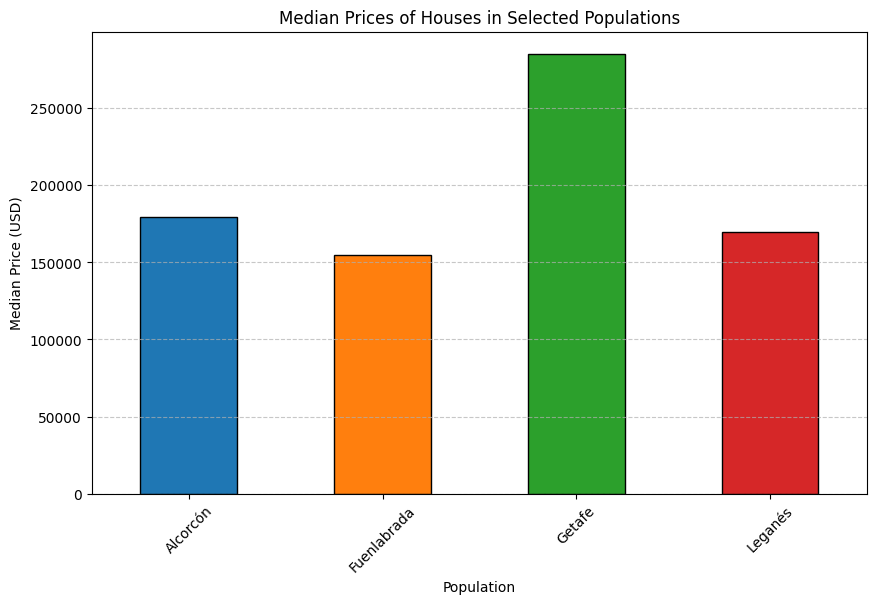

In [21]:
# TODO: Code
ds = pd.read_csv('assets/real_estate.csv', sep=';')
housingData = pd.DataFrame(ds)

subsetData = housingData[housingData['level5'].isin(["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"])]

averagePrices = subsetData.groupby('level5')['price'].median()

plt.figure(figsize=(10, 6)) 
averagePrices.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], edgecolor='black')
plt.title('Median Prices of Houses in Selected Populations') 
plt.xlabel('Population') 
plt.ylabel('Median Price (USD)') 
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

the Getafe populations has the most expensive houses

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in Exercise 14) (★★★)

Print both values for each variable.

In [22]:
# TODO
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
housingData = pd.DataFrame(ds)

subsetData = housingData[housingData['level5'].isin(["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"])]

columnData = ['price', 'rooms', 'surface', 'bathrooms']

statistics = {}
# print(statistics)

for column in columnData:
    mean = subsetData[column].mean()
    variance = subsetData[column].var()
    statistics[column] = {'mean': mean, 'variance': variance}

for column, stats in statistics.items():
    print(f"Column: {column}")
    print(f"  Mean: {stats['mean']:.2f}")
    print(f"  Variance: {stats['variance']:.2f}")
    print()



Column: price
  Mean: 223094.48
  Variance: 14921367508.05

Column: rooms
  Mean: 3.02
  Variance: 0.72

Column: surface
  Mean: 111.75
  Variance: 4263.05

Column: bathrooms
  Mean: 1.63
  Variance: 0.57



#### Exercise 17. What is the most expensive house in each population? You must use the subset obtained in Exercise 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population.

In [23]:
# TODO
import pandas as pd
from geopy.geocoders import Nominatim

ds = pd.read_csv('assets/real_estate.csv', sep=';')
housingData = pd.DataFrame(ds)

housingData['latitude'] = housingData['latitude'].str.replace(',', '.').astype(float)
housingData['longitude'] = housingData['longitude'].str.replace(',', '.').astype(float)

def get_address(latitude, longitude):
    geolocator = Nominatim(user_agent="address_from")
    coordinates = f"{latitude:.6f}, {longitude:.6f}"
    location = geolocator.geocode(coordinates)
    return location.address if location else None

subsetData = housingData[housingData['level5'].isin(["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"])]

expensiveHouses = subsetData.loc[subsetData.groupby('level5')['price'].idxmax()]

for index, row in expensiveHouses.iterrows():
    address = get_address(row['latitude'], row['longitude'])
    print(f"Population: {row['level5']}")
    print(f"  Address: {address}")
    print(f"  Price: {row['price']} USD")
    print()


Population: Alcorcón
  Address: M-506, Campodón, Norte, Alcorcón, Comunidad de Madrid, 28933, España
  Price: 950000 USD

Population: Fuenlabrada
  Address: Calle de Paulo Freire, El Vivero, El Vivero - Hospital - Universidad, Fuenlabrada, Comunidad de Madrid, 28942, España
  Price: 490000 USD

Population: Getafe
  Address: Plaza de Benjamín Palencia, Centro, Getafe, Comunidad de Madrid, 28901, España
  Price: 1050000 USD

Population: Leganés
  Address: Avenida Reina Sofía, Leganés Norte, Leganés, Comunidad de Madrid, 28819, España
  Price: 650000 USD



#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in Exercise 14) (★★★)

For the normalization method, you can use the one you consider; there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot.

Hint: You can help yourself by reviewing the *multihist* demo of Matplotlib.

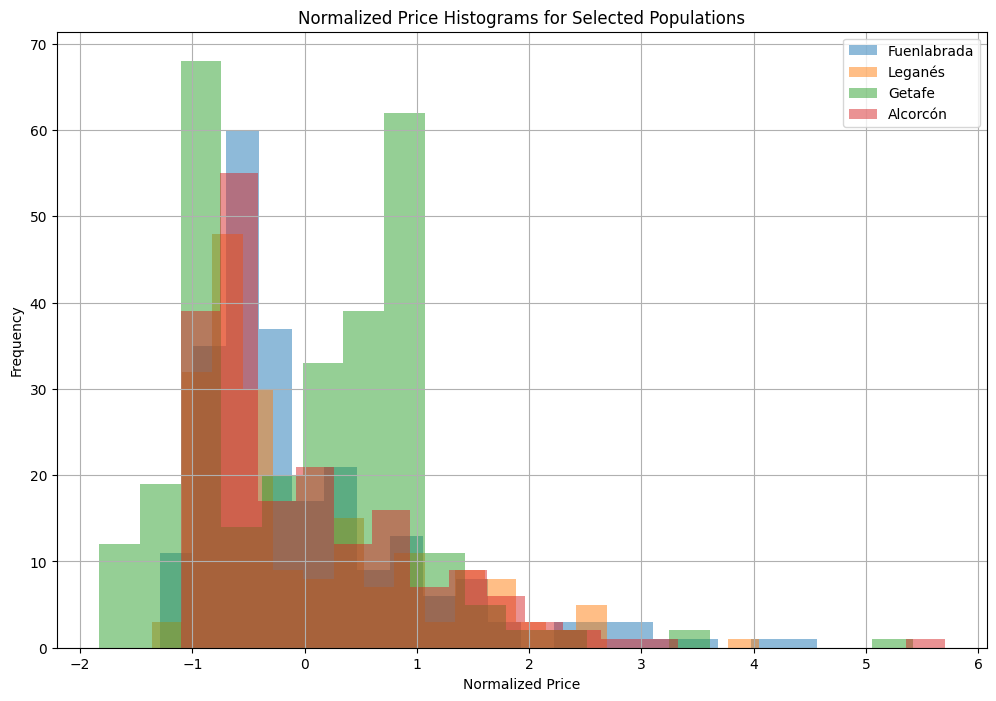

In [24]:
# TODO
import pandas as pd
import matplotlib.pyplot as plt

ds = pd.read_csv('assets/real_estate.csv', sep=';')
housingData = pd.DataFrame(ds)

subsetData = housingData[housingData['level5'].isin(["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"])].copy()

subsetData.loc[:, 'normalized_price'] = subsetData.groupby('level5')['price'].transform(lambda x: (x - x.mean()) / x.std())

populations = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
plt.figure(figsize=(12, 8))

for population in populations:
    population_data = subsetData[subsetData['level5'] == population]
    plt.hist(population_data['normalized_price'], bins=20, alpha=0.5, label=population)

plt.title('Normalized Price Histograms for Selected Populations')
plt.xlabel('Normalized Price')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


Fuenlabrada, Leganés, and Alcorcón the prices are more centered around the average.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in Exercise 14 (★★☆)

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [25]:
# TODO
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
housingData = pd.DataFrame(ds)

housingData['pps'] = housingData['price'] / housingData['surface']

subsetData = housingData[housingData['level5'].isin(["Getafe", "Alcorcón"])]

getafepps = subsetData[subsetData['level5'] == 'Getafe']['pps'].describe()
alcorconpps = subsetData[subsetData['level5'] == 'Alcorcón']['pps'].describe()

print("Getafe Price per Square Meter Statistics:")
print(getafepps)
print()
print("Alcorcón Price per Square Meter Statistics:")
print(alcorconpps)


Getafe Price per Square Meter Statistics:
count     241.000000
mean     2066.314949
std       741.872702
min         0.000000
25%      1684.285714
50%      1973.333333
75%      2628.787879
max      3827.160494
Name: pps, dtype: float64

Alcorcón Price per Square Meter Statistics:
count     173.000000
mean     2239.302480
std       539.951527
min       604.761905
25%      1904.081633
50%      2207.792208
75%      2472.727273
max      3698.159509
Name: pps, dtype: float64


#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph. You must use the subset obtained in Exercise 14 (★★☆)
 
Hint: Make a scatter plot of each population using subplots.

/tmp/ipykernel_115907/929237869.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsetData['pps'] = subsetData['price'] / subsetData['surface']


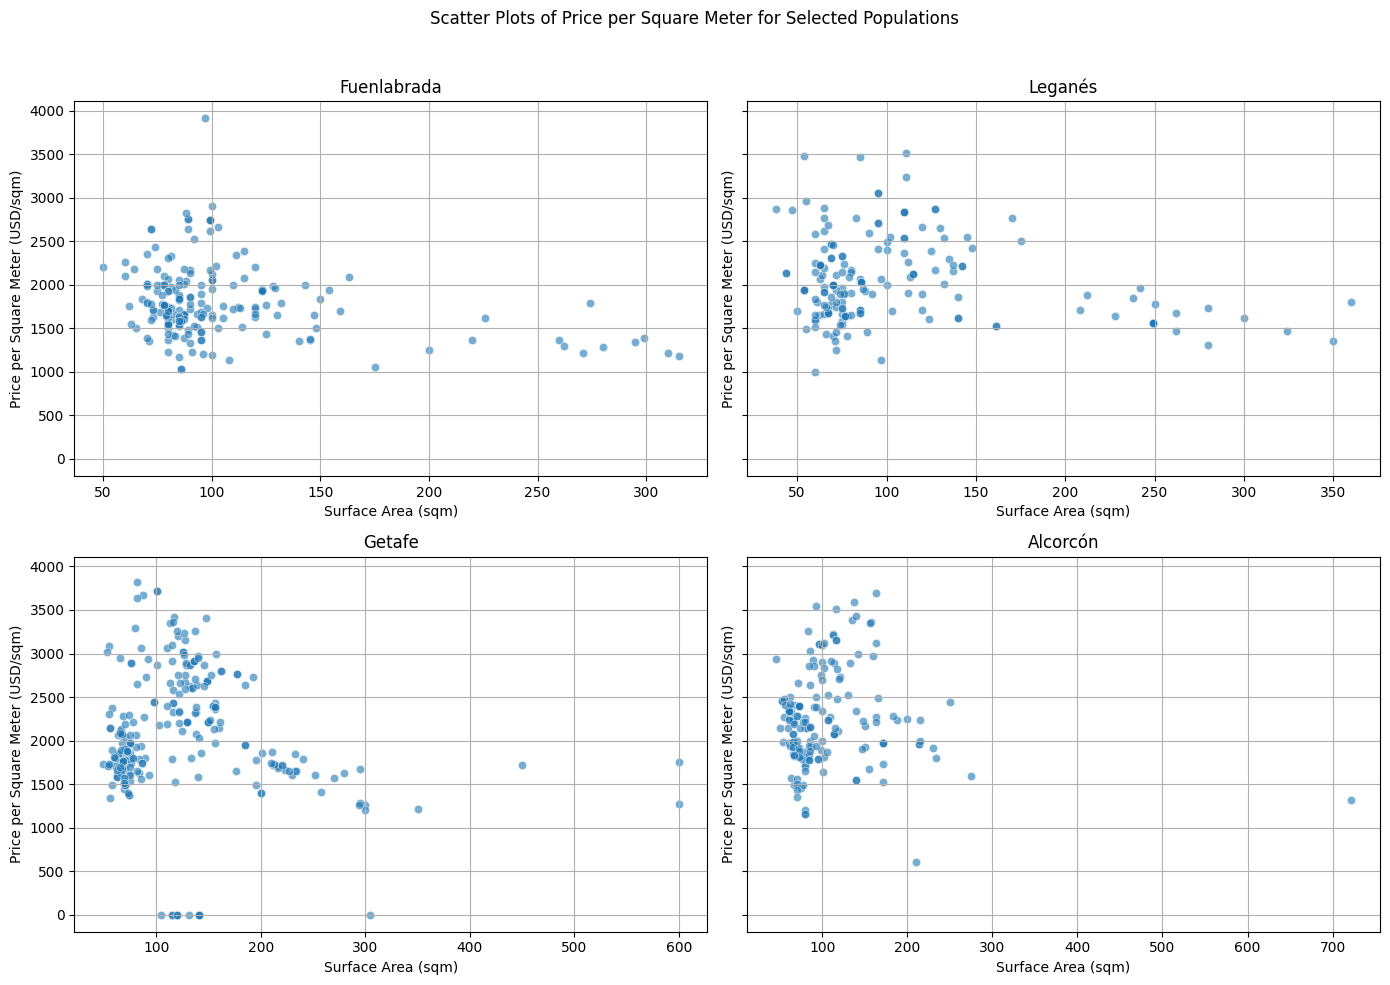

In [26]:
# TODO
import pandas as pd
import matplotlib.pyplot as plt

ds = pd.read_csv('assets/real_estate.csv', sep=';')
housingData = pd.DataFrame(ds)

subsetData = housingData[housingData['level5'].isin(["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"])]

subsetData['pps'] = subsetData['price'] / subsetData['surface']

populations = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)

for ax, population in zip(axes.flat, populations):
    popData = subsetData[subsetData['level5'] == population]
    ax.scatter(popData['surface'], popData['pps'], alpha=0.6, edgecolors='w', linewidth=0.5)
    ax.set_title(f'{population}')
    ax.set_xlabel('Surface Area (sqm)')
    ax.set_ylabel('Price per Square Meter (USD/sqm)')
    ax.grid(True)

plt.suptitle('Scatter Plots of Price per Square Meter for Selected Populations')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in Exercise 14) (★★★★)

Execute the following cell, and then start coding in the next one. You must implement a simple code that transforms the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [27]:
from ipyleaflet import Map, basemaps

# Map centered on (60 degrees latitude and -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

AttributeError: Stamen

/tmp/ipykernel_115907/3498380499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsetData['latitude'] = subsetData['latitude'].str.replace(',', '.').astype(float)
/tmp/ipykernel_115907/3498380499.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsetData['longitude'] = subsetData['longitude'].str.replace(',', '.').astype(float)


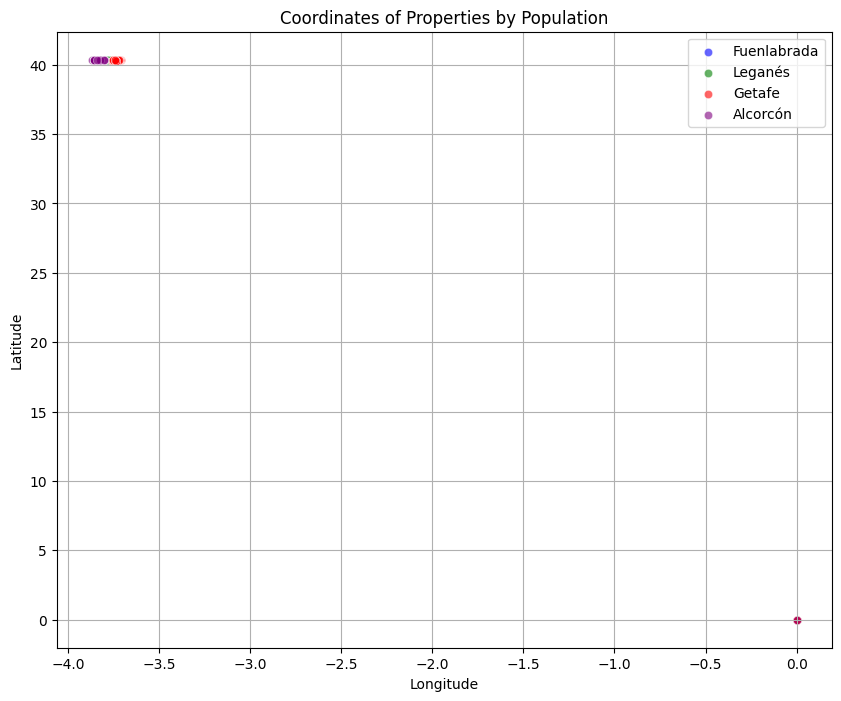

In [ ]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:
import pandas as pd
import matplotlib.pyplot as plt

ds = pd.read_csv('assets/real_estate.csv', sep=';')
housingData = pd.DataFrame(ds)

subsetData = housingData[housingData['level5'].isin(["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"])]

# Convert latitude and longitude to float
subsetData['latitude'] = subsetData['latitude'].str.replace(',', '.').astype(float)
subsetData['longitude'] = subsetData['longitude'].str.replace(',', '.').astype(float)

coordinates_dict = {
    'latitude': subsetData['latitude'].tolist(),
    'longitude': subsetData['longitude'].tolist(),
    'population': subsetData['level5'].tolist()
}

color_map = {
    'Fuenlabrada': 'blue',
    'Leganés': 'green',
    'Getafe': 'red',
    'Alcorcón': 'purple'
}

plt.figure(figsize=(10, 8))
for population in color_map.keys():
    pop_data = subsetData[subsetData['level5'] == population]
    plt.scatter(pop_data['longitude'], pop_data['latitude'], c=color_map[population], label=population, alpha=0.6, edgecolors='w', linewidth=0.5)

plt.title('Coordinates of Properties by Population')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()
